In [1]:
# Imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Load Cleaned Dataset
df = pd.read_csv("../data/processed/RTA_cleaned.csv")
# get the unique values of Accident_severity column
df['Accident_severity'].unique()

array([2, 1, 0], dtype=int64)

In [13]:
# Split Features & Target
X = df.drop("Accident_severity", axis=1)
y = df["Accident_severity"]

In [14]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [16]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE class distribution:")
print(pd.Series(y_resampled).value_counts())

After SMOTE class distribution:
Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64


In [17]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [18]:
# Feature Scaling (for SVM & Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Model: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


🌲 Random Forest Results
Accuracy: 0.8827012321971516
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2085
           1       0.83      0.85      0.84      2100
           2       0.85      0.81      0.83      2064

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249



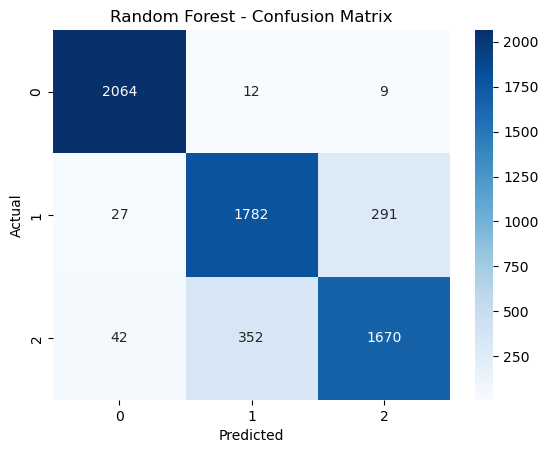

In [20]:
print("\n🌲 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🧠 SVM Results
Accuracy: 0.7217154744759161
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2085
           1       0.64      0.64      0.64      2100
           2       0.71      0.60      0.65      2064

    accuracy                           0.72      6249
   macro avg       0.72      0.72      0.72      6249
weighted avg       0.72      0.72      0.72      6249



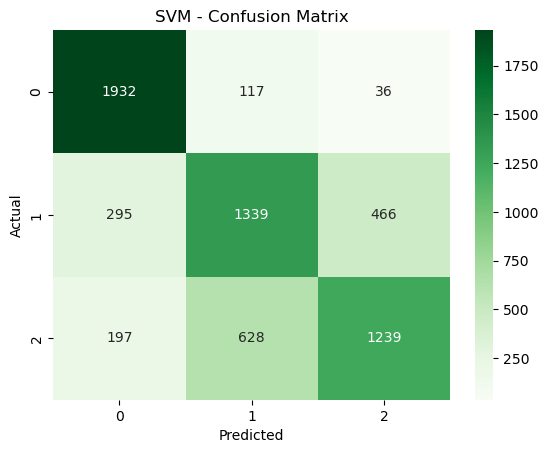

In [21]:
# Model: Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)

print("\n🧠 SVM Results")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, fmt='d', cmap='Greens')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🤖 Naive Bayes Results
Accuracy: 0.4451912305968955
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.81      0.56      2085
           1       0.36      0.19      0.25      2100
           2       0.61      0.33      0.43      2064

    accuracy                           0.45      6249
   macro avg       0.46      0.45      0.41      6249
weighted avg       0.46      0.45      0.41      6249



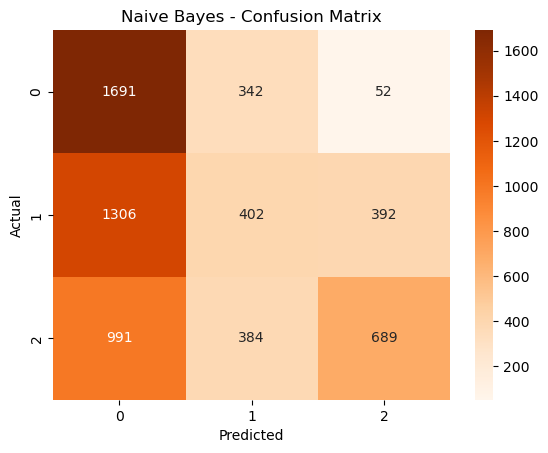

In [25]:
# -------------------------------------
# 8. Model: Naive Bayes
# -------------------------------------
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_preds = nb.predict(X_test_scaled)

print("\n🤖 Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()